# HW1

본 과제에서는  student performance dataset를 활용하여, final exam에 통과 여부를 예측합니다. <br>
EDA와 적절한 Data pre-processing을 진행하고, 정제된 데이터를 바탕으로 가장 높은 성능의 예측 모델(분류기)를 만드는 것이 목표입니다. <br> <br>
사용 라이브러리 및 코드 분량에 대한 제약이 없으므로, 필요에 따라 코드 스니펫을 추가하여 수행하세요.<br><br>

**제출 결과물**
- *HW1.ipynb*
- 전처리 완료된 *student dataset 데이터프레임* (.csv)
- *과제 보고서* (PDF 형식)




## 1. Data pre-processing & EDA

### Main Goal : 모델 학습 전 데이터 전처리 및 분석

### Sub Goals : 모델 학습 및 평가에 필요한 데이터를 전처리합니다.

1. Types of Variables
2. Data Quality
3. Data Transformation
4. Graphical Summary
**Data pre-processing에서 모든 feature를 사용해야 합니다.(임의의 feature를 drop하지 마세요.)**<br>


### Columns(variable) Description

#### HW1에서 활용할 데이터셋(student performance)의 변수 설명입니다.

Name |	Description
-|-
Student_ID |	Unique identifier for each student.
Gender	Gender | of the student (Male/Female).
Study_Hours_per_Week |	Average number of study hours per week.
Attendance_Rate |	Attendance percentage (50% - 100%).
Past_Exam_Scores |	Average score of previous exams (50 - 100).
Parental_Education_Level |	Education level of parents (High School, Bachelors, Masters, PhD).
Internet_Access_at_Home | 	Whether the student has internet access at home (Yes/No).
Extracurricular_Activities |	Whether the student participates in extracurricular activities (Yes/No).
class_name | The name of 3 Class. (Morning, Midday, Evening)
Final_Exam_Score (Target) |	The final exam score of the student (50 - 100, integer values).
Pass_Fail (Target) |	The student status (Pass/Fail).

### 0. Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/student_performance_dataset_final.csv") # 구글 드라이브에 데이터셋(csv)을 업로드한 후, 경로를 지정해주세요.

### 1. Types of Variables

* HW1에서 활용할 student performance 데이터셋이 어떤 데이터로 구성되었는지 확인한 후, 각 데이터 타입을 정의합니다. (보고서에 작성)
* e.g) nominal, ordinal, discrete, continuous

Name |	Description | Data Type |
-|-|-
Gender |Gender of the student (Male/Female). | -
Study_Hours_per_Week |	Average number of study hours per week. | -
Attendance_Rate |	Attendance percentage (50% - 100%). | -
Past_Exam_Scores |	Average score of previous exams (50 - 100). | -
Parental_Education_Level |	Education level of parents (High School, Bachelors, Masters, PhD). | -
Internet_Access_at_Home | 	Whether the student has internet access at home (Yes/No). | -
Extracurricular_Activities |	Whether the student participates in extracurricular activities (Yes/No). | -
class_name | The name of 3 Class. (Morning, Midday, Evening) | -
Final_Exam_Score |	The final exam score of the student (50 - 100, integer values). | -
Pass_Fail |	The student status (Pass/Fail). | -

In [4]:
# 데이터프레임을 출력하여 확인하기
df

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,class_name,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86.0,High School,Yes,Yes,Morning Class,63,Pass
1,S136,Male,16,78.222927,73.0,PhD,No,No,Midday Class,50,Fail
2,S209,Female,21,87.525096,74.0,PhD,Yes,No,Morning Class,55,Fail
3,S458,Female,27,92.076483,99.0,Bachelors,No,No,Morning Class,65,Pass
4,S078,Female,37,98.655517,63.0,NaN,No,Yes,Midday Class,70,Pass
...,...,...,...,...,...,...,...,...,...,...,...
703,S492,Male,14,84.658761,78.0,PhD,Yes,No,Midday Class,50,Fail
704,S301,Male,35,60.278990,83.0,Masters,No,No,Morning Class,62,Pass
705,S473,Male,25,98.384969,75.0,Bachelors,Yes,No,Evening Class,57,Fail
706,S307,Female,21,96.148012,84.0,Bachelors,Yes,No,Evening Class,65,Pass


### 2. Data Quality

* 모델 학습에 활용할 데이터 품질을 높이기 위하여 전처리를 진행합니다.
* 1. 중복 데이터 처리 (duplicated sample)
* 2. 누락 데이터 처리 (missing value), **KNN Imputator 활용**
* 3. 이상치 (outlier) 처리
* *필요시 데이터 처리 순서 변경해도 무관합니다.*

In [5]:
# 중복 데이터 처리
df_copy = df.copy();
duplicate_rows = df_copy[df_copy.duplicated(subset=['Student_ID'], keep=False)]
print("duplicate_rows: ", len(duplicate_rows))
df_copy = df.drop_duplicates(subset=['Student_ID'], keep='first')
df_copy.duplicated().sum()

duplicate_rows:  320


np.int64(0)

In [6]:
# 1. 누락 데이터 확인
df_copy.isnull().sum()


,0
Student_ID,0
Gender,0
Study_Hours_per_Week,0
Attendance_Rate,0
Past_Exam_Scores,21
Parental_Education_Level,27
Internet_Access_at_Home,0
Extracurricular_Activities,0
class_name,0
Final_Exam_Score,0


In [7]:
df_copy[['Parental_Education_Level']].value_counts()
# 범주형 변수인데, 소수값이 들어가는 것은 적절하지 않다. 이 점을 유의해서 knn을 진행한다.

,count
Parental_Education_Level,
High School,130
Bachelors,119
PhD,116
Masters,108


In [8]:
from sklearn.preprocessing import LabelEncoder
## 3번에 범주형 인코딩이 있지만, 오류나지 않도록 미리 인코딩을 합니다.

# 1. Label Encoding: 이진 변수들
# parental_education_level은 knn 사용을 위해 제외
label_cols = ['Gender', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'class_name', 'Pass_Fail']

for col in label_cols:
  df_copy[col] = LabelEncoder().fit_transform(df_copy[col].astype(str))

# 2. One-Hot Encoding: 순서 없는 다중 범주형
df_copy = pd.get_dummies(df_copy, columns=['class_name'], drop_first=False)


/tmp/ipython-input-8-2192261624.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[col] = LabelEncoder().fit_transform(df_copy[col].astype(str))
/tmp/ipython-input-8-2192261624.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[col] = LabelEncoder().fit_transform(df_copy[col].astype(str))
/tmp/ipython-input-8-2192261624.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [9]:
# 2. knn imputer
# 2.1. past_exam_scores 먼저 knn으로 채운 후,
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
df_copy[['Past_Exam_Scores']] = knn_imputer.fit_transform(df_copy[['Past_Exam_Scores']])
df_copy.isnull().sum()

,0
Student_ID,0
Gender,0
Study_Hours_per_Week,0
Attendance_Rate,0
Past_Exam_Scores,0
Parental_Education_Level,27
Internet_Access_at_Home,0
Extracurricular_Activities,0
Final_Exam_Score,0
Pass_Fail,0


In [10]:
from sklearn.neighbors import NearestNeighbors

# 결측치 인덱스
missing_idx = df_copy[df_copy['Parental_Education_Level'].isna()].index
features = df_copy.drop(columns=['Student_ID', 'Parental_Education_Level'])

# KNN 훈련
known_data = features[df_copy['Parental_Education_Level'].notna()]
known_labels = df_copy.loc[known_data.index, 'Parental_Education_Level']
missing_data = features.loc[missing_idx]

nn = NearestNeighbors(n_neighbors=3)
nn.fit(known_data)
_, indices = nn.kneighbors(missing_data)

# 최빈값 사용
imputed_vals = []
for neighbors in indices:
    vals = known_labels.iloc[neighbors]
    imputed_vals.append(vals.mode().iloc[0])

# 결측치 채우기
df_copy.loc[missing_idx, 'Parental_Education_Level'] = imputed_vals


In [11]:
df_copy['Parental_Education_Level'].value_counts()

,count
Parental_Education_Level,
High School,142
Bachelors,125
PhD,121
Masters,112


In [12]:
# 이상치 처리

In [13]:
# 카테고리형 데이터에서 카테고리 개수를 넘는 게 있는 지 확인.
df_copy.nunique()

,0
Student_ID,500
Gender,2
Study_Hours_per_Week,30
Attendance_Rate,500
Past_Exam_Scores,76
Parental_Education_Level,4
Internet_Access_at_Home,2
Extracurricular_Activities,2
Final_Exam_Score,27
Pass_Fail,2


In [14]:
# max값과 min값 등을 확인해서 데이터가 범위를 넘어가는 값이 있는 지 확인.
df_copy.describe()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.488000,25.184000,75.830689,77.459290,0.474000,0.464000,56.378000,0.292000
std,0.500357,8.804384,13.969186,17.721117,0.499824,0.499202,6.266551,0.455138
min,0.000000,10.000000,50.116970,50.000000,0.000000,0.000000,50.000000,0.000000
25%,0.000000,18.000000,64.959340,63.000000,0.000000,0.000000,50.000000,0.000000
50%,0.000000,26.000000,76.752661,77.459290,0.000000,0.000000,55.000000,0.000000
75%,1.000000,33.000000,87.548861,89.000000,1.000000,1.000000,61.000000,1.000000
max,1.000000,39.000000,99.967675,147.000000,1.000000,1.000000,77.000000,1.000000


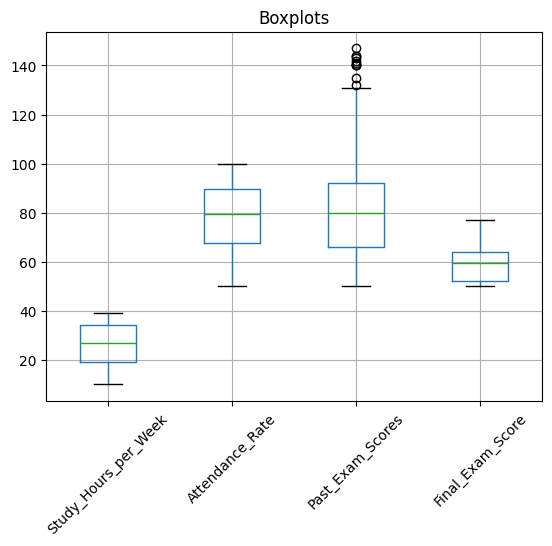

In [15]:
# numeric 데이터 시각화
# 시각화된 데이터로 위의 표를 더 쉽게 해석해볼 수 있다.
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Final_Exam_Score']

df[numerical_columns].boxplot(rot=45)
plt.title("Boxplots")
plt.show()

In [16]:
# Past_Exam_Scores는 값이 50과 100 사이여야 되는 데, 100을 넘는 데이터가 있어서 오류로 간주하고 처리한다.

# 이상치 수 출력
count_over_100 = (df_copy['Past_Exam_Scores'] > 100).sum()
print(f"100을 초과하는 Past_Exam_Scores 값 개수: {count_over_100}")

# 이상치 처리
# 방법 1 : 제거
# df_copy = df_copy[df_copy['Past_Exam_Scores'] <= 100]

# 방법 2: 최빈값으로 대체 (데이터 소실이 적지만, 데이터의 정확도 측면에선 떨어질 수 있음.)
mode_value = df_copy.loc[df_copy['Past_Exam_Scores'] <= 100, 'Past_Exam_Scores'].mode()[0]
df_copy.loc[df_copy['Past_Exam_Scores'] > 100, 'Past_Exam_Scores'] = mode_value


100을 초과하는 Past_Exam_Scores 값 개수: 27


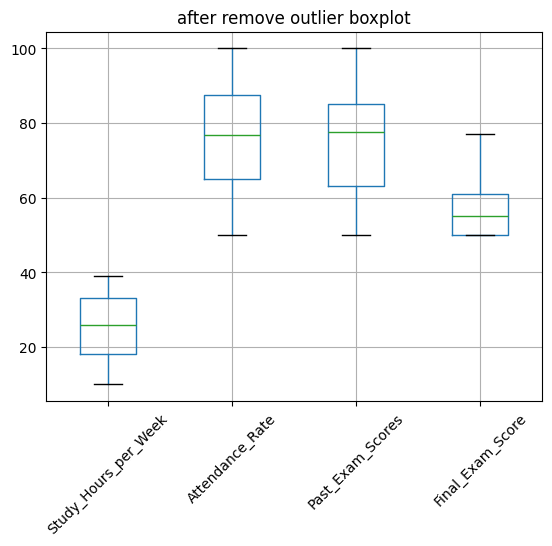

In [17]:
# numeric 데이터 시각화
# 이상치가 잘 제거 되었는지 다시 확인한다.
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Final_Exam_Score']

df_copy[numerical_columns].boxplot(rot=45)
plt.title("after remove outlier boxplot")
plt.show()

### 3. Data Transformation

* 모델 학습을 위하여 student performance 데이터셋을 모두 수치형 데이터으로 변환합니다.
* 변경해야하는 모든 feature들을 선택하고 적절히 변환하시오.
* 해당 선택된 feature들과 선택 이유 변환 방법 등을 근거를 보고서에 상세히 기술합니다.

In [18]:
## 2번에서 이미 범주형 데이터를 인코딩하였지만, 위에서 그대로 카피해서 옮겨 놓았다.
## 대신 Parental_Education_Level은 knn 전에 인코딩하면 0, 1, 2, 3 외의 값이 나오기 때문에 knn 이후에 인코딩을 진행한다.

df_copy.head()

# 1. Label Encoding: 이진 변수들
# label_cols = ['Gender', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Pass_Fail', 'Parental_Education_Level']
# for col in label_cols:
#   df_copy[col] = LabelEncoder().fit_transform(df_copy[col].astype(str))

# 2. One-Hot Encoding: 순서 없는 다중 범주형
# df_copy = pd.get_dummies(df_copy, columns=['class_name'], drop_first=False)

# 3. Parental_Education_Level은 직접 매핑
edu_map = {'High School': 0, 'Bachelors': 1, 'Masters': 2, 'PhD': 3}
df_copy['Parental_Education_Level'] = df_copy['Parental_Education_Level'].map(edu_map)
df_copy.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail,class_name_0,class_name_1,class_name_2
0,S147,1,31,68.267841,86.0,0,1,1,63,1,False,False,True
1,S136,1,16,78.222927,73.0,3,0,0,50,0,False,True,False
2,S209,0,21,87.525096,74.0,3,1,0,55,0,False,False,True
3,S458,0,27,92.076483,99.0,1,0,0,65,1,False,False,True
4,S078,0,37,98.655517,63.0,0,0,1,70,1,False,True,False


### 4. Graphical Summary

* 학생의 시험 통과 여부를 예측하기 위해 데이터를 시각화하여 분석합니다.
* 상관 관계, 비교 분석 등 시각화와 함께 최소 2가지 이상 진행하세요 (Barcharts, Scatter Plot, Histograms, Heatmap 중 최소 2개 활용).
* 어떤 feature가 Pass_Fail 예측에 도움이 될 수 있을지를 고려하여 분석하시오.
* 분석한 결과에 대하여 보고서에 상세히 기술하세요.

In [ ]:
# 상관관계 분석

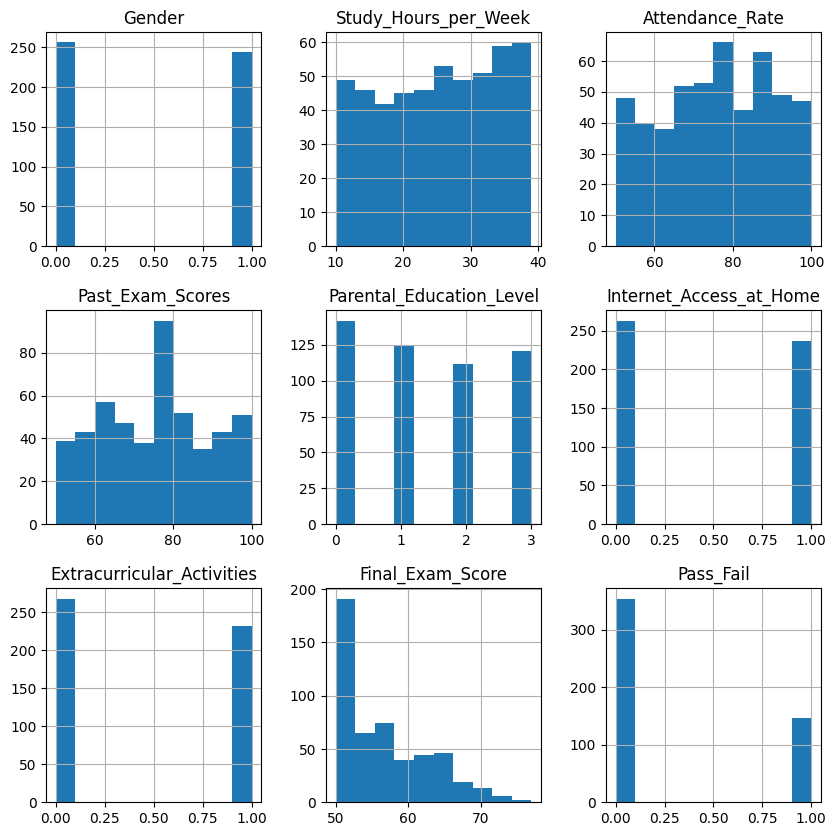

In [19]:
# 데이터 분포 확인
df_copy.hist(figsize=(10, 10))
plt.show()

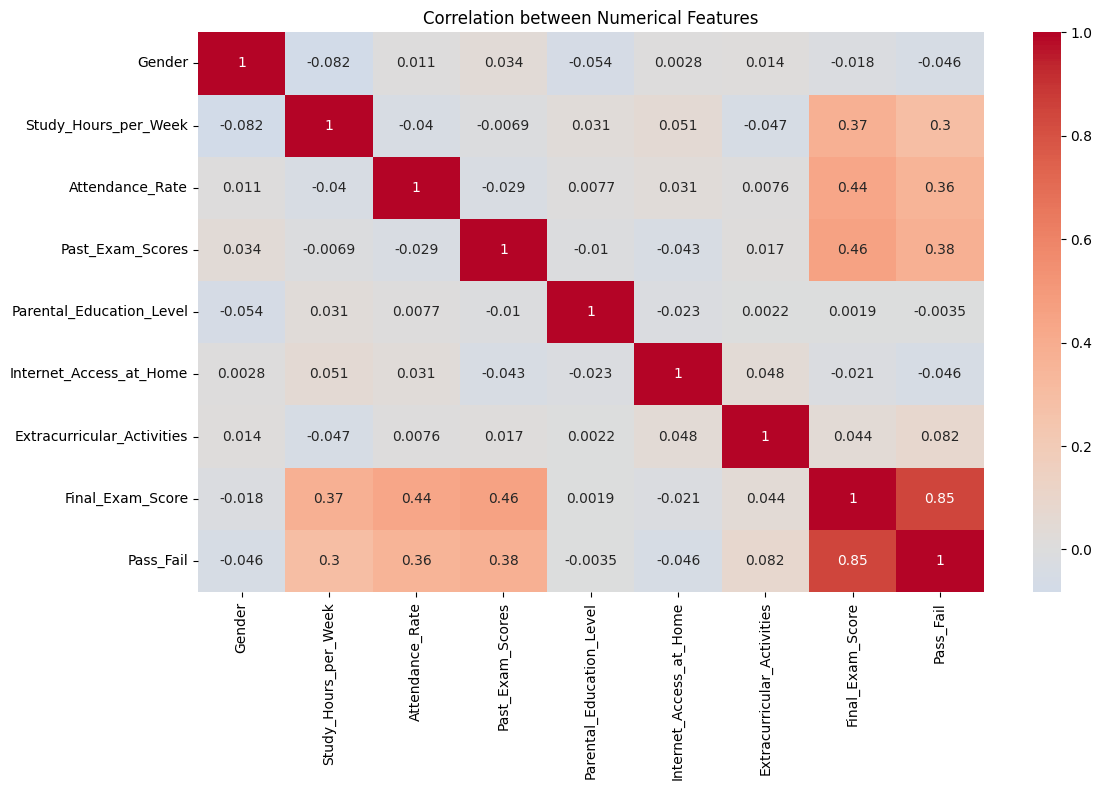

In [20]:
# 1. 상관관계 히트맵 (수치형 변수들 간의 관계)
import numpy as np

plt.figure(figsize=(12, 8))
numeric_cols = df_copy.select_dtypes(include=[np.number]).columns
correlation_matrix = df_copy[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Numerical Features')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

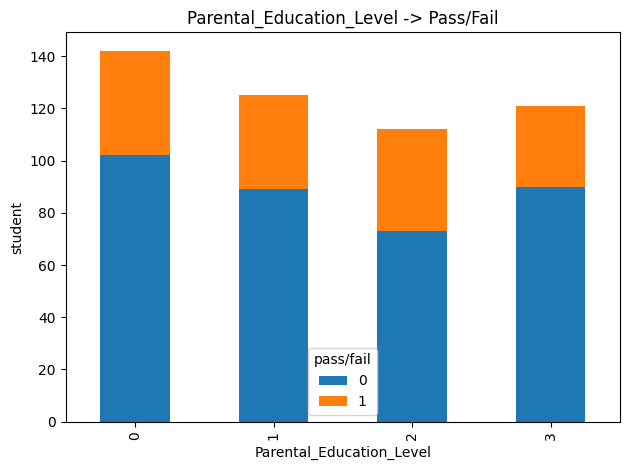

In [21]:
# 2. Pass/Fail에 따른 Parental_Education_Level 분포 (막대 그래프)
plt.figure(figsize=(10, 6))
edu_pass_fail = pd.crosstab(df_copy['Parental_Education_Level'], df_copy['Pass_Fail'])
edu_pass_fail.plot(kind='bar', stacked=True)
plt.title('Parental_Education_Level -> Pass/Fail')
plt.xlabel('Parental_Education_Level')
plt.ylabel('student')
plt.legend(title='pass/fail')
plt.tight_layout()
plt.show()

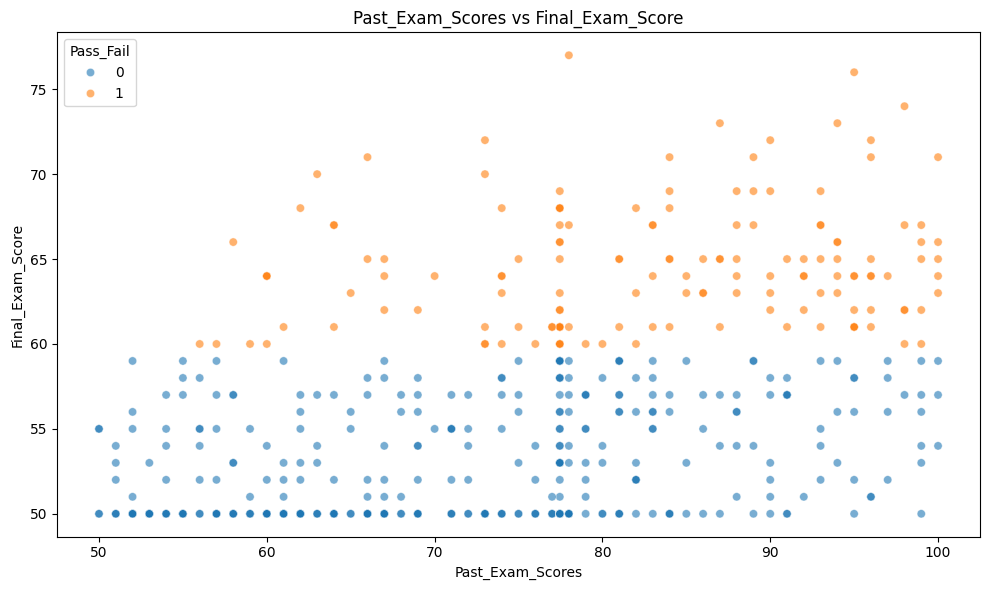

In [22]:
# 3. Past_Exam_Scores와 Final_Exam_Score의 산점도 (Pass/Fail에 따른 색상 구분)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Past_Exam_Scores', y='Final_Exam_Score', hue='Pass_Fail', alpha=0.6)
plt.title('Past_Exam_Scores vs Final_Exam_Score')
plt.xlabel('Past_Exam_Scores')
plt.ylabel('Final_Exam_Score')
plt.tight_layout()
plt.show()

### 5. 전처리된 데이터셋 제출

- 전처리된 데이터프레임을 csv로 변환하여 다운받아 과제란에 제출하세요.
- Data Transform된 feature들의 경우 원래 feature 이름과 동일해야합니다.
- 이름이 변경된 컬럼이 있다면 원래 이름으로 변경해주세요.

In [23]:
# 다운로드 받아서 과제란에 제출
#df_copy.columns

output_path = "/content/drive/MyDrive/student_performance_dataset_final_02.csv"
df_copy.to_csv(output_path, index=False)

output_path

'/content/drive/MyDrive/student_performance_dataset_final_02.csv'

## 2. Classification

### Main Goal : Model training & validation

### Sub Goals : Pre-processing한 데이터를 활용해 직접 학습 및 검증합니다.
1. DT, RF, SVM 중 가장 높은 성능의 Classifier 찾기
2. 5-fold cross validation을 활용하여 평가 및 **하이퍼파라미터 최소 2개 이상 튜닝**
3. validation에서 선택된 Best 모델로 test set에 대해서 성능 평가

### Dataset Construction & Split

**주의 : 데이터셋은 1에서 진행한 전처리된 데이터를 사용해야합니다!!**

해당 데이터셋은 두가지 label을 가지고 있습니다. <br>
* Final_Exam_Score : 학생의 최종 시험성적에 대한 수치 데이터
* Pass_Fail : 학생의 최종 시험성적에 따른 Pass/Fail 범주형 데이터
<br><br>

HW1에서 학습할 모델은 'Pass_Fail'에 대한 분류 모델입니다.<br>
**Final_Exam_Score를 학습에서 활용하지 않도록 주의해주세요.**

* 필요에 따라 X에 대해서 feature selection을 진행해도 됩니다.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

path = "/content/drive/MyDrive/student_performance_dataset_final_02.csv" # 전처리 데이터 path 설정 필요


#==================아래 변경 금지===================#
df = pd.read_csv(path)
X =  df.drop(columns=["Student_ID", "Final_Exam_Score", "Pass_Fail"]) # target 제거
y = df["Pass_Fail"] # target

# feature selection이 필요하면 진행 가능
# X = X[['Selected feature 1', 'Selected feature 2', ... ]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train & Validation

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [26]:
# Decision Tree Classifier

# 하이퍼파라미터 그리드 정의
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# GridSearchCV 실행
print("\nDecision Tree 하이퍼파라미터 튜닝 시작...")
grid_search.fit(X_train, y_train)

# 모든 파라미터 조합의 결과 출력
print("\n=== 모든 파라미터 조합의 결과 ===")
for i, (params, mean_score, std_score) in enumerate(zip(grid_search.cv_results_['params'],
                                                       grid_search.cv_results_['mean_test_score'],
                                                       grid_search.cv_results_['std_test_score'])):
    print(f"\n파라미터 조합 {i+1}:")
    print(f"Parameters: {params}")
    print(f"CV Accuracy: {mean_score:.4f}")

# 최적의 하이퍼파라미터 출력
print("\n=== 최적의 하이퍼파라미터 ===")
print("Parameters:", grid_search.best_params_)
print("CV Accuracy:", grid_search.best_score_)



Decision Tree 하이퍼파라미터 튜닝 시작...
Fitting 5 folds for each of 90 candidates, totalling 450 fits

=== 모든 파라미터 조합의 결과 ===

파라미터 조합 1:
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV Accuracy: 0.7200

파라미터 조합 2:
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV Accuracy: 0.7275

파라미터 조합 3:
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
CV Accuracy: 0.7575

파라미터 조합 4:
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV Accuracy: 0.7475

파라미터 조합 5:
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
CV Accuracy: 0.7400

파라미터 조합 6:
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
CV Accuracy: 0.7650

파라미터 조합 7:
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 

In [27]:
# Random Forest Classifier
# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# GridSearchCV 실행
print("\nRandom Forest 하이퍼파라미터 튜닝 시작...")
grid_search.fit(X_train, y_train)

# 모든 파라미터 조합의 결과 출력
print("\n=== 모든 파라미터 조합의 결과 ===")
for i, (params, mean_score, std_score) in enumerate(zip(grid_search.cv_results_['params'],
                                                       grid_search.cv_results_['mean_test_score'],
                                                       grid_search.cv_results_['std_test_score'])):
    print(f"\n파라미터 조합 {i+1}:")
    print(f"Parameters: {params}")
    print(f"CV Accuracy: {mean_score:.4f}")

# 최적의 하이퍼파라미터 출력
print("\n=== 최적의 하이퍼파라미터 ===")
print("Parameters:", grid_search.best_params_)
print("CV Accuracy:", grid_search.best_score_)



Random Forest 하이퍼파라미터 튜닝 시작...
Fitting 5 folds for each of 648 candidates, totalling 3240 fits

=== 모든 파라미터 조합의 결과 ===

파라미터 조합 1:
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
CV Accuracy: 0.7900

파라미터 조합 2:
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
CV Accuracy: 0.7925

파라미터 조합 3:
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
CV Accuracy: 0.7925

파라미터 조합 4:
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
CV Accuracy: 0.7950

파라미터 조합 5:
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
CV Accuracy: 0.

In [28]:
# SVM Classifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
import numpy as np

# SVM 하이퍼파라미터 탐색 공간 정의 (Random Search용)
param_dist = {
    'C': [5, 10, 15, 20],
    'gamma': ['auto'],
    'kernel': ['rbf'],
    'class_weight': ['balanced', None]
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    estimator=SVC(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# RandomizedSearchCV 실행
print("\nSVM 하이퍼파라미터 랜덤 서치 시작...")
random_search.fit(X_train, y_train)

# 모든 파라미터 조합의 결과 출력
print("\n=== 모든 파라미터 조합의 결과 ===")
for i, (params, mean_score, std_score) in enumerate(zip(random_search.cv_results_['params'],
                                                        random_search.cv_results_['mean_test_score'],
                                                        random_search.cv_results_['std_test_score'])):
    print(f"\n파라미터 조합 {i+1}:")
    print(f"Parameters: {params}")
    print(f"CV Accuracy: {mean_score:.4f}")

# 최적의 하이퍼파라미터 출력
print("\n=== 최적의 하이퍼파라미터 ===")
print("Parameters:", random_search.best_params_)
print("CV Accuracy:", random_search.best_score_)


SVM 하이퍼파라미터 랜덤 서치 시작...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



=== 모든 파라미터 조합의 결과 ===

파라미터 조합 1:
Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 5}
CV Accuracy: 0.7100

파라미터 조합 2:
Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'class_weight': None, 'C': 5}
CV Accuracy: 0.7100

파라미터 조합 3:
Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 10}
CV Accuracy: 0.7100

파라미터 조합 4:
Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'class_weight': None, 'C': 10}
CV Accuracy: 0.7100

파라미터 조합 5:
Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 15}
CV Accuracy: 0.7100

파라미터 조합 6:
Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'class_weight': None, 'C': 15}
CV Accuracy: 0.7100

파라미터 조합 7:
Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 20}
CV Accuracy: 0.7100

파라미터 조합 8:
Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'class_weight': None, 'C': 20}
CV Accuracy: 0.7100

=== 최적의 하이퍼파라미터 ===
Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'class

### Final Test score (accuracy)

- accuracy 82% 이상의 모델을 제시하시오.

In [29]:
# Validation에서 가장 높은 성능을 보인 Model의 testset에 대한 accuracy 도출
def accuracy_report(model, X_train, y_train, X_test, y_test):
    # 학습
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)

    # 정확도
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # 결과 출력
    print("=== Decision Tree 성능 (Test Set) ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred))

In [30]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 최적 파라미터로 모델 생성
best_dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=30,
    random_state=42
)

accuracy_report(best_dt, X_train, y_train, X_test, y_test)


=== Decision Tree 성능 (Test Set) ===
Accuracy : 0.7600
Precision: 0.5185
Recall   : 0.5600
F1-Score : 0.5385

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        75
           1       0.52      0.56      0.54        25

    accuracy                           0.76       100
   macro avg       0.68      0.69      0.69       100
weighted avg       0.77      0.76      0.76       100



In [31]:
# random forest
best_rf = RandomForestClassifier(
    criterion='entropy',
    max_depth=10,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

accuracy_report(best_rf, X_train, y_train, X_test, y_test)

=== Decision Tree 성능 (Test Set) ===
Accuracy : 0.7900
Precision: 0.5833
Recall   : 0.5600
F1-Score : 0.5714

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        75
           1       0.58      0.56      0.57        25

    accuracy                           0.79       100
   macro avg       0.72      0.71      0.72       100
weighted avg       0.79      0.79      0.79       100



In [32]:
# SVM
best_svm = SVC(
    C=10,
    class_weight='balanced',
    gamma='auto',
    kernel='rbf',
    random_state=42
)

accuracy_report(best_svm, X_train, y_train, X_test, y_test)

=== Decision Tree 성능 (Test Set) ===
Accuracy : 0.7900
Precision: 0.7500
Recall   : 0.2400
F1-Score : 0.3636

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        75
           1       0.75      0.24      0.36        25

    accuracy                           0.79       100
   macro avg       0.77      0.61      0.62       100
weighted avg       0.78      0.79      0.75       100



## 3. extra credit

- 추가 점수를 위해 도전해 보세요.
- 2에서 진행한 것과와 동일하게, 5-fold CV로 평가 및 하이퍼파라미터를 튜닝하고 Test set에서 최종 성능을 평가합니다.
- Test Accucracy 87% 이상 시 점수 부여
- DT, RF, SVM 이외의 분류기를 사용하시오. (단일 KNN 제외)
- ex) boosting, bagging 등



In [33]:
# 새로운 분류기 모델 정의 및 학습

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

print("\nXGBoost 하이퍼파라미터 튜닝 시작...")
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=42),
    param_grid=xgb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)

# 모든 파라미터 조합의 결과 출력
print("\n=== 모든 파라미터 조합의 결과 ===")
for i, (params, mean_score, std_score) in enumerate(zip(xgb_grid.cv_results_['params'],
                                                        xgb_grid.cv_results_['mean_test_score'],
                                                        xgb_grid.cv_results_['std_test_score'])):
    print(f"\n파라미터 조합 {i+1}:")
    print(f"Parameters: {params}")
    print(f"CV Accuracy: {mean_score:.4f}")

# 최적의 하이퍼파라미터 출력
print("\n=== 최적의 하이퍼파라미터 ===")
print("Parameters:", xgb_grid.best_params_)
print("CV Accuracy:", xgb_grid.best_score_)


XGBoost 하이퍼파라미터 튜닝 시작...
Fitting 5 folds for each of 96 candidates, totalling 480 fits

=== 모든 파라미터 조합의 결과 ===

파라미터 조합 1:
Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
CV Accuracy: 0.7825

파라미터 조합 2:
Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
CV Accuracy: 0.7775

파라미터 조합 3:
Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
CV Accuracy: 0.7975

파라미터 조합 4:
Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
CV Accuracy: 0.7900

파라미터 조합 5:
Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
CV Accuracy: 0.7800

파라미터 조합 6:
Parameters: {'colsamp

In [34]:
# accuracy
# 최적 모델로 테스트 세트 평가
best_xgb = xgb.XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    n_estimators=200,
    random_state=42
)

accuracy_report(best_xgb, X_train, y_train, X_test, y_test)

=== Decision Tree 성능 (Test Set) ===
Accuracy : 0.7500
Precision: 0.5000
Recall   : 0.6000
F1-Score : 0.5455

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        75
           1       0.50      0.60      0.55        25

    accuracy                           0.75       100
   macro avg       0.68      0.70      0.69       100
weighted avg       0.77      0.75      0.76       100



수고하셨습니다! 과제란에 다음 파일을 제출해주세요.
- 학번_HW1.ipynb
- 전처리 완료된 student dataset 데이터프레임 (학번_HW1.csv)
- 과제 보고서 (학번_HW1.pdf)